In [190]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

import shap
import eli5

In [191]:
# from google.colab import drive
# drive.mount('/content/drive')

In [192]:
# full dataset, with emojis
# train_dataset_path = "/content/drive/MyDrive/Dataset2/bert_train_preprocessed.txt"
# test_dataset_path = "/content/drive/MyDrive/Dataset2/bert_test_preprocessed.txt"

# # subset with emojis
# train_dataset_path = "/content/drive/MyDrive/Dataset2/bert_train_preprocessed_examples_with_emojis.txt"
# test_dataset_path = "/content/drive/MyDrive/Dataset2/bert_test_preprocessed_examples_with_emojis.txt"

# subset without emojis
train_dataset_path = "/content/drive/MyDrive/Dataset2/bert_train_preprocessed_examples_with_emojis_removed.txt"
test_dataset_path = "/content/drive/MyDrive/Dataset2/bert_test_preprocessed_examples_with_emojis_removed.txt"




df_train = pd.read_csv(train_dataset_path, sep="\t")
df_test = pd.read_csv(test_dataset_path, sep="\t")

In [193]:
X_train = df_train["text"]
X_test = df_test["text"]
y_train = df_train["label"]
y_test = df_test["label"]

In [194]:
print(len(X_test)+len(X_train))
# print(len(X_train))

491


In [195]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) 

In [196]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2', random_state=55)
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
print()
pr, re ,f1,_  = precision_recall_fscore_support(y_test, y_predict, average='binary')
print("Precision", str(pr))
print("Recall", str(re))
print("F1", str(f1))
print("ACC:", str(accuracy_score(y_test,y_predict)))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 
print(precision_recall_fscore_support(y_test, y_predict, average='binary'))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        55
           1       0.56      0.61      0.58        33

    accuracy                           0.67        88
   macro avg       0.65      0.66      0.65        88
weighted avg       0.68      0.67      0.67        88

Confusion Matrix: [[39 16]
 [13 20]]

Precision 0.5555555555555556
Recall 0.6060606060606061
F1 0.5797101449275361
ACC: 0.6704545454545454
AUC: 0.7041322314049587
(0.5555555555555556, 0.6060606060606061, 0.5797101449275361, None)


In [197]:
explainer = shap.Explainer(lr_tfidf, X_train_vectors_tfidf, feature_names=tfidf_vectorizer.get_feature_names())
shap_values = explainer(X_val_vectors_tfidf)

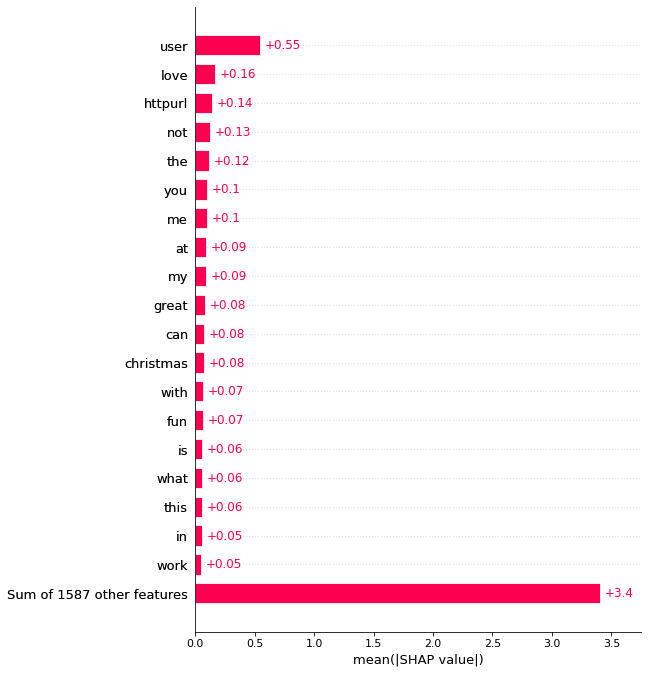

In [198]:
shap.plots.bar(shap_values, max_display=20)


In [199]:
shap.initjs()
index = 29
print(X_test[index])
shap.plots.force(shap_values[index])

What a golden morning . #not


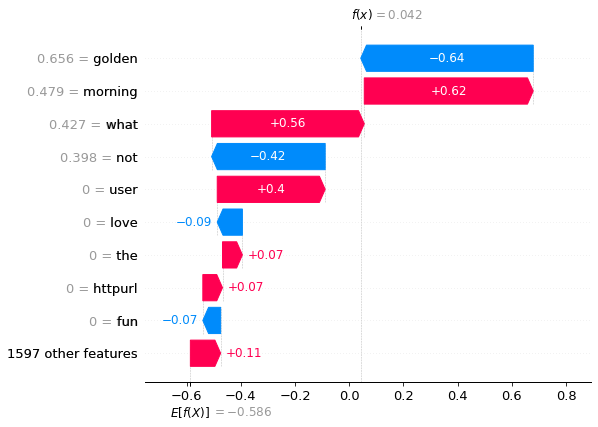

In [200]:
shap.plots.waterfall(shap_values[index])

In [201]:
eli5.show_weights(estimator=lr_tfidf, 
                  feature_names= list(tfidf_vectorizer.get_feature_names()),
                 top=(30, 30))

Weight?,Feature
+4.034,fun
+3.444,at
+3.364,love
+2.927,hours
+2.792,great
+2.623,an
+2.245,down
+2.193,omg
+2.188,tell
+2.148,waking
